# SEJAL GUPTA

## Task 1 : Prediction using supervised ML

## Predict the percentage of an student based on the no. of study hours.

## Import Library

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load Dataset

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## Print Dataset

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Properties and Shape of the dataset

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Check the data for any null values, count the number of null values in each column

In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## ScatterPlot

### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script

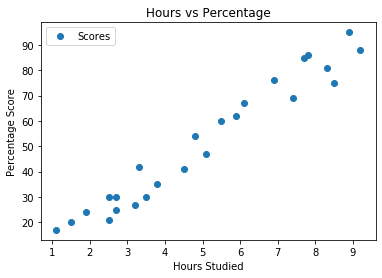

In [11]:
# Plotting the distribution of score
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## PairPlot

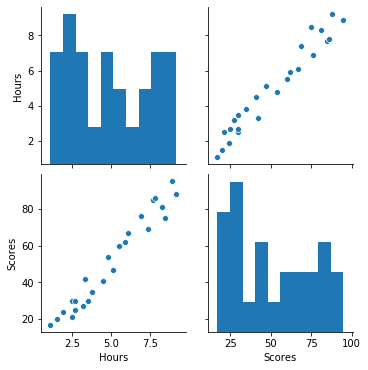

In [13]:
sns.pairplot(df)

## Preparing the data

### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

## Splitting the dataset into training and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the Model

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


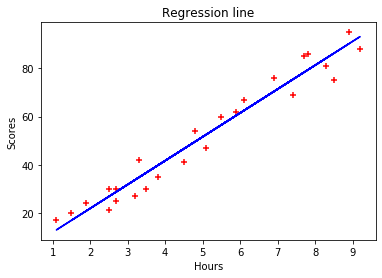

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red',marker='+')
plt.plot(X, line, color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")
plt.show()

## Comparing Actual vs Predicted Scores

In [19]:
Y_pred=regressor.predict(X_test)    #predicting the Scores for test data
print(Y_pred)
Y_test1 = list(y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the model

### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [21]:
  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Y_pred)) 
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


## Predicting the score using regression

In [23]:
solution = regressor.predict([[9.25]])
print("predicted score if a student studies for 9.25 hrs/ day :",solution)

predicted score if a student studies for 9.25 hrs/ day : [93.69173249]


## Conclusion

### From the above result we can say that if a studied for 9.25 hours in a day then student will secured 93.69 marks